In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_excel('Data_1.xlsx')
data_2 = pd.read_excel('Data_2.xlsx')

d:\Anaconda\envs\pytorch\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data_1

,编号,X坐标（单位: m）,Y坐标（单位:m）,Z坐标（单位: m）,前后距离,校正点类型,第三问点标记
0,0,0.000000,50000.000000,5000.000000,NaN,A 点,0
1,1,33070.825831,2789.480761,5163.524680,NaN,0,0
2,2,54832.887019,49179.219108,1448.303791,NaN,1,1
3,3,77991.545911,63982.175286,5945.823038,NaN,0,0
4,4,16937.179535,84714.341903,5360.293002,NaN,0,0
...,...,...,...,...,...,...,...
608,608,45789.201490,21191.207906,440.001872,NaN,1,0
609,609,94917.734859,82958.725321,6169.657707,NaN,0,0
610,610,14870.601682,95939.173362,8248.836185,NaN,0,0
611,611,93009.567446,4549.333260,7882.608297,NaN,1,0


In [4]:
print('data_1 shape: ', data_1.shape)
print('data_2 shape: ', data_2.shape)

data_1_len = len(data_1)
data_2_len = len(data_1)
print(data_1_len)

data_1 shape:  (613, 7)
data_2 shape:  (327, 8)
613


In [5]:
# 垂直校准（垂直最大误差， 水平最大误差），水平校准（垂直最大误差， 水平最大误差），按规划前行最小误差，单位误差
data_1_param = [25, 15, 25, 20, 30, 0.001]
data_2_param = [20, 10, 15, 20, 20, 0.001]

In [6]:
data_1_A_x = data_1.iloc[0,1]
data_1_A_y = data_1.iloc[0,2]
data_1_A_z = data_1.iloc[0,3]

data_1_B_x = data_1.iloc[data_1_len - 1, 1]
data_1_B_y = data_1.iloc[data_1_len - 1, 2]
data_1_B_z = data_1.iloc[data_1_len - 1, 3]

data_1_start_end_x = [data_1_A_x, data_1_B_x]
data_1_start_end_y = [data_1_A_y, data_1_B_y]
data_1_start_end_z = [data_1_A_z, data_1_B_z]

data_1_point_x = data_1.iloc[ 1:data_1_len - 2, 1].to_list()
data_1_point_y = data_1.iloc[ 1:data_1_len - 2, 2].to_list()
data_1_point_z = data_1.iloc[ 1:data_1_len - 2, 3].to_list()
# data_2
data_2_A_x = data_2.iloc[0,1]
data_2_A_y = data_2.iloc[0,2]
data_2_A_z = data_2.iloc[0,3]

data_2_B_x = data_1.iloc[data_2_len - 1, 1]
data_2_B_y = data_1.iloc[data_2_len - 1, 2]
data_2_B_z = data_1.iloc[data_2_len - 1, 3]

data_2_start_end_x = [data_2_A_x, data_2_B_x]
data_2_start_end_y = [data_2_A_y, data_2_B_y]
data_2_start_end_z = [data_2_A_z, data_2_B_z]

data_2_point_x = data_2.iloc[1:data_2_len - 2, 1].to_list()
data_2_point_y = data_2.iloc[1:data_2_len - 2, 2].to_list()
data_2_point_z = data_2.iloc[1:data_2_len - 2, 3].to_list()



In [7]:
a_b_string = ['A', 'B']

In [8]:
print(len(data_1_point_x))
print(len(data_1_point_y))
print(len(data_1_point_z))
print(data_1_B_z)
print(data_1_point_z[0])

610
610
610
5022.00116448164
5163.5246804925


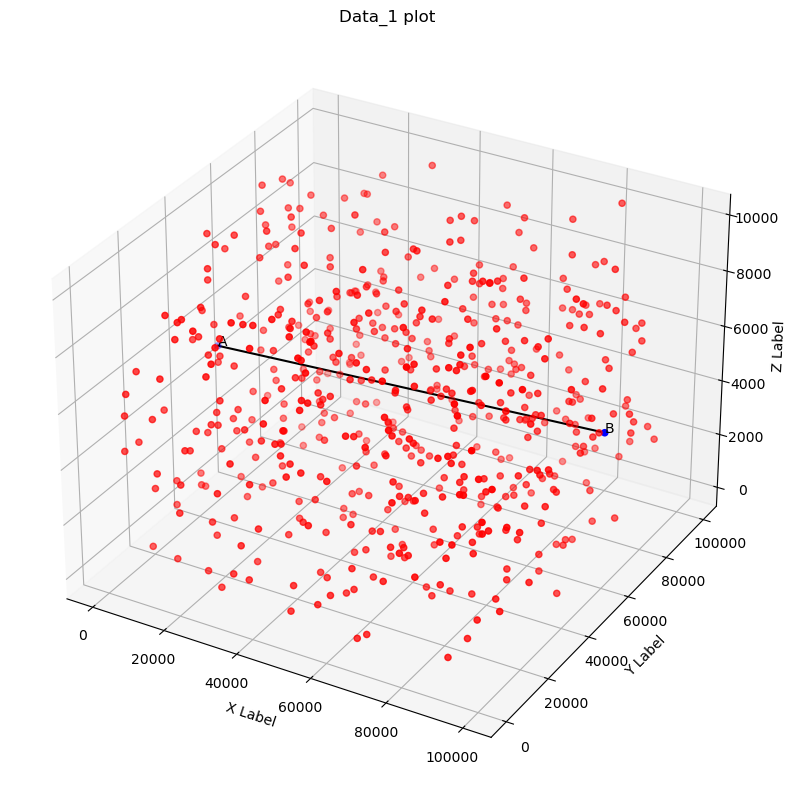

In [9]:
fig = plt.figure(figsize=(10, 10), dpi =100)
# 创建3d绘图区域
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



ax.scatter3D(data_1_start_end_x, data_1_start_end_y, data_1_start_end_z, c = 'blue')
ax.scatter3D(data_1_point_x, data_1_point_y, data_1_point_z, c = 'red')

for i in range(0, len(a_b_string)):
    ax.text(data_1_start_end_x[i], data_1_start_end_y[i], data_1_start_end_z[i], a_b_string[i])
ax.set_title('Data_1 plot')
ax.plot3D(data_1_start_end_x, data_1_start_end_y, data_1_start_end_z, 'black' )
plt.show()

100000.0


NameError: name 'x_2' is not defined

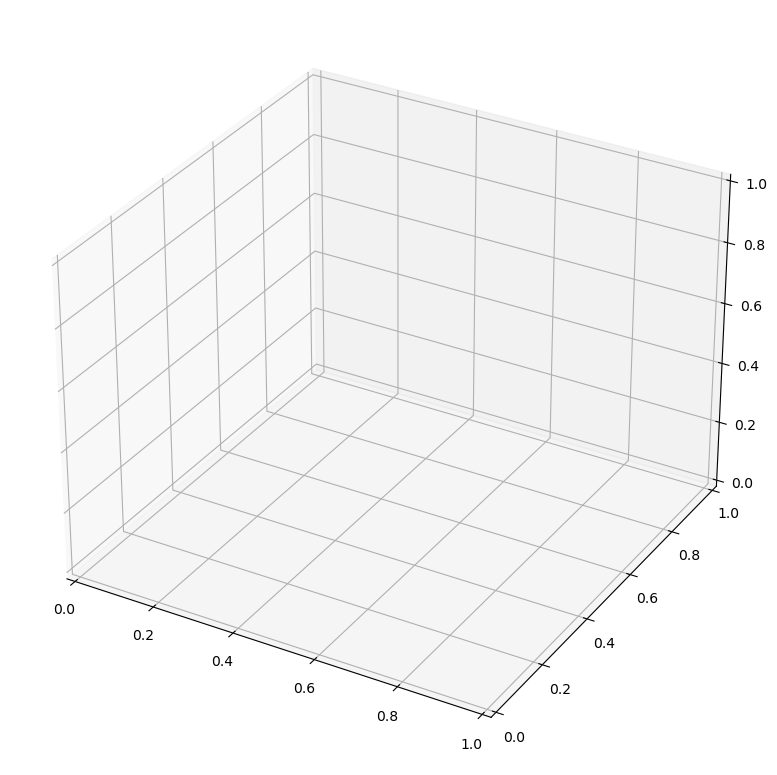

In [11]:
fig2 = plt.figure(figsize=(10, 10), dpi =100)
# 创建3d绘图区域
ax1 = plt.axes(projection='3d')

ax1.plot3D(x_2, y_2, z_2, 'gray')
ax1.scatter3D(x_2, y_2, z_2)
for i in range(0, len(index)):
    ax1.text(x_2[i], y_2[i], z_2[i], index[i])
ax1.set_title('Data_2 plot')
plt.show()

In [ ]:
from math import sqrt
import math
data_1_dist = [0]
data_2_dist = [0]
for i in range(1, len(index)):
    print('x_1_a: ', x_1[i-1], 'x_1_b: ', x_1[i])
    temp_1 = math.pow(x_1[i] - x_1[i-1], 2) + math.pow(y_1[i] - y_1[i-1], 2) + math.pow(z_1[i] - z_1[i-1], 2)
    print('temp_1: ', temp_1)
    data_1_dist.append(temp_1)
    temp_2 = math.pow(x_2[i] - x_2[i-1], 2) + math.pow(y_2[i] - y_2[i-1], 2) + math.pow(z_2[i] - z_2[i-1], 2)
    data_2_dist.append(temp_2)
    print('temp_2: ', temp_2)
    
    
print()
print('data_1_dist')
print(data_1_dist)


x_1_a:  0.0 x_1_b:  33070.825830821
temp_1:  3322539388.283523
temp_2:  7411483053.561336
x_1_a:  33070.825830821 x_1_b:  54832.8870194109
temp_1:  2639397997.3545003
temp_2:  9284497080.858513
x_1_a:  54832.8870194109 x_1_b:  77991.5459109057
temp_1:  775678672.6251211
temp_2:  3863507372.0965986
x_1_a:  77991.5459109057 x_1_b:  16937.1795347311
temp_1:  4157801231.649706
temp_2:  6387264473.94257
x_1_a:  16937.1795347311 x_1_b:  339.689397597742
temp_1:  5240919478.810347
temp_2:  2247940934.163502
x_1_a:  339.689397597742 x_1_b:  3941.9305560814
temp_1:  3648989366.2020645
temp_2:  1809747121.609467

data_1_dist
[0, 3322539388.283523, 2639397997.3545003, 775678672.6251211, 4157801231.649706, 5240919478.810347, 3648989366.2020645]


In [ ]:
# 两种思路，第一种使用动态规划，边走边规划
# 第二种使用遗传算法
# 两个优化目标：（1）

[0,
 57641.47281500988,
 51375.07175035866,
 27851.008466932057,
 64481.0145054318,
 72394.19506293544,
 60406.865224095716]